<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

## 5.1 Empirical distributions

大多数水文变量都是连续的，但由于我们的测量能力，我们对它们进行了离散测量。使用bin进行离散数据的分类，为离散数据的平均连续处理提供了手段。数据的底层分布的可视化是通过绘制直方图实现的。直方图描述离散区间上的频率。让我们从直方图开始。在下面的例子中，首先我们将生成一些虚拟的数据，然后计算并绘制直方图。

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

x = np.random.randn(100) #生成模拟数据

# 计算直方图
n,low_range,binsize,extrapoints = st.histogram(x)
upper_range = low_range + binsize*(len(n)-1)
bins = np.linspace(low_range,upper_range,len(n))

C:\Users\laihetao\AppData\Local\conda\conda\envs\DataProcess\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `histogram` is deprecated!
scipy.stats.histogram is deprecated in scipy 0.17.0; use np.histogram instead
  if __name__ == '__main__':


`st,histogram`提供了在每个区间(n)中bin的数量，bin的下限(low_range),bins的宽(binsize)，以及不用于计算直方图的点。由于bin的大小与所有的bin相同，所以Pyhon只提供一个bin的大小。我们使用bin 的下限和大小来计算bin的上限范围，然而计算所有bin的中农位数的值。现在可以使用`bar`绘制直方图。我们也将定义bar的宽度和颜色

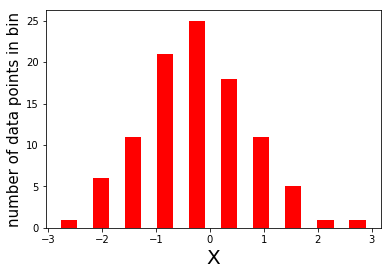

In [2]:
plt.bar(bins,n,width=0.3,color='red')
plt.xlabel('X',fontsize=20)
plt.ylabel('number of data points in bin',fontsize=15)
plt.show()

<center>图5.1:x的直方图</center>

数据的直方图如图5.1所示。在这个例子中，因为我们刚刚从正态分布创建了100个随机数，直方图没有展示正态分布应该显示的行为。

直方图中的每个bar都告诉我们，数据在特定的bin中有多少次。查看数据的行为的一个更好的方法是查看相对直方图，它告诉我们点在某一范围内发概率。通过将每个bin的频率除以所有箱中的频率之和，得到相对直方图或相对频率。相对直方图表示数据发生在bin中的数据的概率。要么是我们可以使用`histogram`函数先计算直方图，然后除以频率总数，要么是我们直接使用`relfreq`函数。`relfreq`提供了相对频率，连同其他与`histogram`类似的输出。

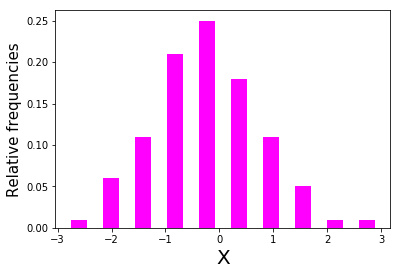

In [3]:
relfreqs,lowlim,binsize,extrapoints = st.relfreq(x)
plt.bar(bins,relfreqs,width=0.3,color='magenta')
plt.xlabel('X',fontsize=20)
plt.ylabel('Relative frequencies',fontsize=15)
plt.show()

<center>图5.2:$x$的相对直方图</center>

因为我们正在使用在之前例子中用过的相同的`x`，因此我们无需重新计算`bins`。在这个柱状图中，我们使用`magenta`颜色。用不同的颜色绘制图形只是为了让你对颜色和字体大小更熟悉。它并不意味着我们应该使用不同颜色为了对比相对直方图和直方图；没有什么能阻止我们使用相同的颜色。

在相对直方图日提5.2所示。相对直方图告诉我们精实现数据的如何表现；在某些范围内，数据出现的次数(或者什么样的可能性)。相对直方图只讲我们用酷狗有的实验数据。我们想要（？）？PDF是一个去描述未来的数据更好的引导者。随机变量中的概率密度函数(pdf)是一个描述相关可能性的函数，用于表示一个给定点的随机变量。落在特点区域的随机变量概率已经由该区域的随机变量的间距给出（？）。概率密度函数在任何地方都是非负的，而且它的间距在整个区间都等于1。我们可以将bin的大小除以相关频率得到pdf。一个简单的计算pdf的方法是使用`hist`函数。`hist`生成图形，也返回每个bin的pdf值。bin的数量由通过给定第二个声明(?)，在下面的例子中被设为了10。`bins`提供了bin的上下限，因此，它的长度bin的数量之外的数。除了颜色外，我们为`hist`函数指定了apha值。`alpha`值控制了图形的透明度；0.0意味着完全都名，1.0是全部填充(?)。PDF柱状图如图5.3所示。

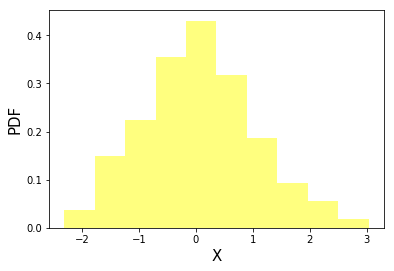

In [4]:
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='yellow', alpha=0.5)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

累计分布函数(CDF)描述了真随机变量$X$的概率。。。。(?)。如果我们将累计频率除以总的频率，会得到CDF。累计频率的最后一个累计频率值等于总的频率，因此我们使用这个来计算CDF。CDF如图5.4所示。

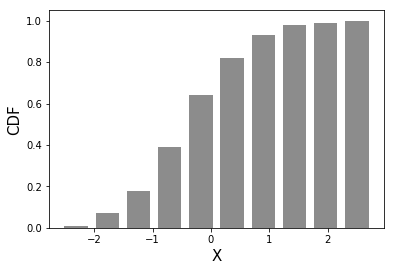

In [5]:
cumfreqs, lowlim, binsize, extrapoints = st.cumfreq(x)
plt.bar(bins[:-1], cumfreqs/cumfreqs[-1], width=0.4, color='black', alpha=0.45)
plt.xlabel('X', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.show()

我们可以使用`scikits`库中的`CDF`函数直接估算实验累计分布函数(ECDF)。关于`scikits`的心在在这里http://pypi.python.org/pypi/scikits.statsmodels。
经验分布函数(CDF)是累计分布函数关联样本经验估计值。这个cdf是一个阶段函数（？）。经验分布函数估计样板中点的底层的cdf。在前面的例子中，我们已经在将数据分类到bin后估计了CDF(ECDF)。这意味着，我们假设在某些小范围内数据表现为统计相似的方式。我们也可以估计CDF而不用做这个假设，这个假设也可以使用`ECDF`函数来完成。`ECDF`函数是一个存储数据值和他们对应的ECDF的对象。使用`ecdf.x`获得数据，对应的ECDF使用`ecdf.f`获得。`ecdf`是你已经定义的用于存储`ECDF`函数输出的边连名。如果你使用其他名称，你需要使用相同的名字得到`x`和`y`属性。

In [10]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

# 生成一些数据
data = np.random.randn(100)

#估计ecdf
ecdf = ECDF(data)

我们应该用一个阶段图绘制ECDF，因为每个ECDF都在某些间距上面。ECDF图如图5.5所示。

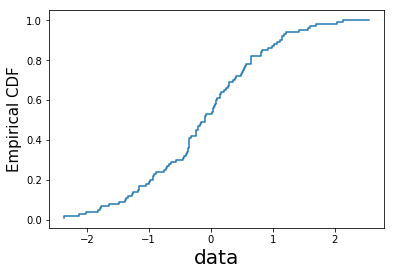

In [11]:
plt.step(ecdf.x,ecdf.y)
plt.xlabel('data',fontsize=20)
plt.ylabel('Empirical CDF',fontsize=15)
plt.show()

<center>图5.5：使用普通方法的经验观测CDF估计值</center>

我们也可以使用`ecdf`估计ECDF在任何数据值(?)。让我们评估和打印在某些数据点(在零)的ECDF的值。